## One-hot encoding

In [1]:
import pandas as pd
import numpy as np

In [2]:
tt_train = pd.read_csv('../1_2/titanic_train.csv')

In [3]:
tt_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

value_counts() 메소드를 사용하면 unique value와 그의 빈도가 나타난다(pandas에서 사용가능)

In [4]:
tt_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [5]:
data_dummies = pd.get_dummies(tt_train)

In [6]:
data_dummies.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Name_Abbing, Mr. Anthony', 'Name_Abbott, Mr. Rossmore Edward',
       'Name_Abbott, Mrs. Stanton (Rosa Hunt)',
       ...
       'Cabin_F G73', 'Cabin_F2', 'Cabin_F33', 'Cabin_F38', 'Cabin_F4',
       'Cabin_G6', 'Cabin_T', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=1731)

In [7]:
data_dummies.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  \
0            1         0       3  22.0      1      0   7.2500   
1            2         1       1  38.0      1      0  71.2833   
2            3         1       3  26.0      0      0   7.9250   
3            4         1       1  35.0      1      0  53.1000   
4            5         0       3  35.0      0      0   8.0500   

   Name_Abbing, Mr. Anthony  Name_Abbott, Mr. Rossmore Edward  \
0                         0                                 0   
1                         0                                 0   
2                         0                                 0   
3                         0                                 0   
4                         0                                 0   

   Name_Abbott, Mrs. Stanton (Rosa Hunt)     ...      Cabin_F G73  Cabin_F2  \
0                                      0     ...                0         0   
1                                      0     ...                0         0   
2                                      0     ...                0         0   
3                                      0     ...                0         0   
4                                      0     ...                0         0   

   Cabin_F33  Cabin_F38  Cabin_F4  Cabin_G6  Cabin_T  Embarked_C  Embarked_Q  \
0          0          0         0         0        0           0           0   
1          0          0         0         0        0           1           0   
2          0          0         0         0        0           0           0   
3          0          0         0         0        0           0           0   
4          0          0         0         0        0           0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  

[5 rows x 1731 columns]

In [8]:
features = data_dummies.loc[:,'Pclass':'Embarked_S']

numpy array를 추출한다.

In [9]:
X = features.values
Y = data_dummies['Survived'].values

In [10]:
X.shape

(891, 1729)

In [11]:
Y.shape

(891,)

**결측값 처리**

pandas는 fillna

numpy는 np.nan_to_num(nan->0, inf->large number)

sklearn에도 imputer제공함(sklearn.preprocessing.Imputer)

In [12]:
X = np.nan_to_num(X)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size=0.3)

In [15]:
lr = LogisticRegression()

In [16]:
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
lr.score(X_test, Y_test)

0.8134328358208955

## Regularization(Shrinkage method)

regularization은 모델이 복잡해져서 발생하는 overfitting문제를 줄이기 위해서 사용된다.

이 때 대표적으로 사용되는 penalty term은 Lasso(L1), Ridge(L2) 가 있다.


### Lasso

Lasso는 sparse coefficient를 만드는 linear model이다.

L1 term이 작아지면 많은 beta값들이 0에 가까워진다.

이 때 alpha값이 크다는 의미는 L1 term의 비중을 높인다는 뜻이다.(OLS+penalty값을 최소로 하는 것을 목표로함)

alpha값이 너무 크면 underfitting, 너무 작으면 overfitting될 가능성이 있다.

In [18]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [19]:
boston = load_boston()

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target, random_state = 0, test_size=0.3)

In [21]:
lr = LinearRegression().fit(X_train, Y_train)

In [22]:
lr.score(X_train, Y_train)

0.7644563391821222

In [23]:
lr.score(X_test, Y_test)

0.6735280865347295

In [24]:
lasso = Lasso().fit(X_train, Y_train)

In [25]:
lasso.score(X_train, Y_train)

0.7083629297638161

In [26]:
lasso.score(X_test, Y_test)

0.6114196752800867

In [27]:
alpha_list = [0.1, 0.5, 1, 5, 10, 50, 100]
lasso_err = []

In [28]:
for i in alpha_list:
    lassocv =  Lasso(alpha=i)
    scores = cross_val_score(lassocv, X_train, Y_train, cv=10)
    lasso_err.append(1-scores.mean())

In [29]:
alpha_optimal = alpha_list[lasso_err.index(min(lasso_err))]

In [30]:
lasso_opt = Lasso(alpha=alpha_optimal).fit(X_train, Y_train)

In [31]:
lasso_opt.score(X_train, Y_train)

0.7529971674072506

In [32]:
lasso_opt.score(X_test, Y_test)

0.6532718054365745

### Ridge

L1 term과는 다르게 L2는 coefficient를 0으로 만들지 않는다.

L1 term은 영향력이 큰 변수는 더 큰 계수를 갖도록, 영향력이 작은 변수는 더 작은 계수를 갖도록 하는 반면,

L2 term은 변수의 영향력을 전반적으로 반영한다고 해석할 수 있다.

In [33]:
from sklearn.linear_model import Ridge

In [34]:
ridge = Ridge().fit(X_train, Y_train)

In [35]:
ridge.score(X_train, Y_train)

0.7622445226799686

In [36]:
ridge.score(X_test, Y_test)

0.6667168412456653

In [37]:
alpha_list = [0.1, 0.5, 1, 5, 10, 50, 100]
ridge_err = []

In [38]:
for i in alpha_list:
    ridgecv = Ridge(alpha=i)
    scores = cross_val_score(ridgecv, X_train, Y_train, cv=10)
    ridge_err.append(1-scores.mean())

In [39]:
alpha_opt = alpha_list[ridge_err.index(min(ridge_err))]

In [40]:
ridge_opt = Ridge(alpha=alpha_opt).fit(X_train, Y_train)

In [41]:
ridge_opt.score(X_train, Y_train)

0.7643853808298933

In [42]:
ridge_opt.score(X_test, Y_test)

0.67269206254381

## Feature Engineering

좀 더 자세한 설명이나 더 많은 실습예제가 필요하다면

"Introduction to Machine Learning with Python"의 Chap4. Representing Data and Engineering Features 참조.

### Univariate Statistics(ANOVA)

ANOVA(Analysis of variance, 분산분석)는 두 개 이상의 집단의 평균의 차이를 분석하기 위해 사용된다(두 집단의 평균 차이를 비교할 때는 t-test 이용). 세 개 이상의 집단의 평균의 차이가 통계적으로 유의한 지 비교할 때 사용할 수 있다.

단변량 통계값을 이용하여 feature selection을 진행해본다

In [43]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

In [44]:
cancer = load_breast_cancer()

In [45]:
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

data에 noise를 추가한다

첫 30개의 feature는 원래 dataset의 feature이고 30~80(50개)의 feature는 noise이다

In [46]:
X_w_noise = np.hstack([cancer.data, noise])

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X_w_noise, cancer.target, random_state = 0, test_size=0.3)

f_classif와 SelectPercentile을 사용하여 feature의 50%를 추출한다

In [48]:
select = SelectPercentile(percentile=50)

In [49]:
select.fit(X_train, Y_train)

SelectPercentile(percentile=50,
         score_func=<function f_classif at 0x7f0130f741e0>)

In [50]:
X_train_selected = select.transform(X_train)

In [51]:
X_train.shape

(398, 80)

In [52]:
X_train_selected.shape

(398, 40)

feature의 수가 80개에서 40개로(50%) 줄어든 것을 확인할 수 있다.

get_support method를 통해 어떤 feature가 선택되었는지 확인할 수 있다.

In [53]:
select.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True,  True, False, False, False,  True,
        True,  True, False,  True, False, False, False, False])

In [54]:
mask = select.get_support()

([], <a list of 0 Text yticklabel objects>)

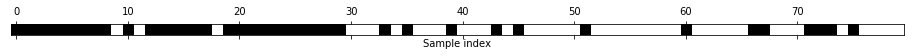

In [55]:
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Sample index')
plt.yticks(())

Logistic regression을 이용하여 전체 feature를 이용한 것과 선택된 feature를 이용한 것의 성능을 비교해보자

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
X_test_selected = select.transform(X_test)

In [58]:
lr = LogisticRegression()

In [59]:
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
lr.score(X_test, Y_test)

0.9181286549707602

In [61]:
lr.fit(X_train_selected, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
lr.score(X_test_selected, Y_test)

0.9532163742690059

### Model-based selection

Lasso regression은 sparse coefficient를 학습하게 되고 feature의 일부만 사용한다. 이것은 일종의 feature selection으로 활용될 수 있다.

Lasso regression을 이용하여 model based feature selection을 수행해보자

다음 시간에 배울 random forest, ensemble model을 이용하여 model based feature selection에 활용할 수도 있다.

In [63]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [64]:
clf_lasso = LassoCV()

In [65]:
smf = SelectFromModel(clf_lasso)

In [66]:
smf.fit(X_train, Y_train)

SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False),
        norm_order=1, prefit=False, threshold=None)

In [67]:
X_train_l1 = smf.transform(X_train)

In [68]:
X_train_l1

array([[404.9 ,  14.34,  21.9 ,  82.04, 467.6 ],
       [334.3 ,  10.08,  24.54,  70.76, 375.4 ],
       [460.3 ,  16.51,  25.22,  86.6 , 564.2 ],
       ...,
       [278.6 ,  30.48,  25.02,  75.79, 439.6 ],
       [288.1 ,  21.69,  20.83,  62.25, 303.8 ],
       [403.5 ,  16.97,  37.16,  82.28, 474.2 ]])

In [69]:
X_train_l1.shape

(398, 5)

In [70]:
X_train.shape

(398, 80)

In [71]:
mask = smf.get_support()

([], <a list of 0 Text yticklabel objects>)

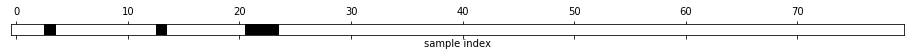

In [72]:
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("sample index")
plt.yticks(())

In [73]:
X_test_l1 = smf.transform(X_test)

In [74]:
lr.fit(X_train_l1, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
lr.score(X_test_l1, Y_test)

0.9415204678362573

In [76]:
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
lr.score(X_test, Y_test)

0.9181286549707602

위 결과를 통해서도 feature selection을 통해 noise를 제거하고 유용한 정보를 추출한 것을 확인할 수 있다.

### Iterative feature selection

sklearn에서는 backward selection 기능을 RFE(Recursive Feature Elimination)로 지원해준다.

RFE는 'coef' 또는 'feature_importances'를 통해 덜 중요한 feature 순서대로 제거한다.

이 과정은 이름에서 추측할 수 있듯이 재귀적으로 진행되고 사용자가 설정한 selection num에 도달할 때까지 진행된다.

In [78]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

In [79]:
clf = SVC(kernel="linear", C=1)

In [80]:
rfe = RFE(estimator=clf, n_features_to_select=20)

In [81]:
rfe.fit(X_train, Y_train)

RFE(estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
  n_features_to_select=20, step=1, verbose=0)

In [82]:
mask = rfe.get_support()

([], <a list of 0 Text yticklabel objects>)

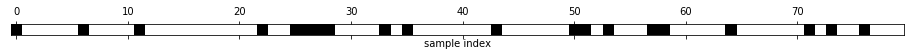

In [83]:
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("sample index")
plt.yticks(())

In [84]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [85]:
lr.fit(X_train_rfe, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
lr.score(X_test_rfe, Y_test)

0.9415204678362573